# MIS 583 Assignment 5: Text Sentiment Classification

Before we start, please put your name and SID in following format: <br>
: LASTNAME Firstname, ?00000000   //   e.g.) 陳耀融, M094020099

**Your Answer:**   
Hi I'm 李畇彤, M114020038

In [1]:
!nvidia-smi

Wed Dec  7 08:28:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    33W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Overview

**Sentiment Classification** is an automated process of identifying opinions in text and labeling them as positive, negative, or neutral, based on the emotions customers express within them.

In this assignment, you need to train a recurrent neural network (RNN)
or fine-tune a pre-trained language model (e.g., BERT) to predict the
sentiment of given tweet.

## Package Install
First, we are going to talk about the model.  
HuggingFace team have created an amazing framework called "transformers" for NLP tasks.  
It havs many State-of-the-art Machine Learning for Pytorch, TensorFlow, and JAX.  

To start with this package, follow [this link to installation and basic tutorial](https://pytorch.org/hub/huggingface_pytorch-transformers/).

In [2]:
# you might need some additional installations there
!echo happy installation
!pip -V
!pip install transformers

happy installation
pip 21.1.3 from /usr/local/lib/python3.8/dist-packages/pip (python 3.8)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##  Versions of used packages

We will check PyTorch version to make sure everything work properly.  
We use `python==3.7.14`, `torch==1.12.1+cu113` and `torchvision==0.13.1+cu113`.  
This is the default version in Google Colab.

In [3]:
import sys
import torch
import torchvision
import transformers
print('python', sys.version.split('\n')[0])
print('torch', torch.__version__)
print('torchvision', torchvision.__version__)
print('transformers', transformers.__version__)

python 3.8.15 (default, Oct 12 2022, 19:14:39) 
torch 1.12.1+cu113
torchvision 0.13.1+cu113
transformers 4.25.1


## Loading Model and Data

In [4]:
from torch import nn

#########################################################################
#            Loading tokenizer and model from transformer               #
#########################################################################
# from transformers import xxx
from transformers import AutoTokenizer, AutoModelForSequenceClassification

bert_type = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

# load from installed huggingface 
tokenizer = AutoTokenizer.from_pretrained(bert_type)
# create a Bert-extended task (classification)
model = AutoModelForSequenceClassification.from_pretrained(bert_type)

# finetune from the output from bert to your task
model.classifier.dense = nn.Linear(in_features=768, out_features=768, bias=False)
model.classifier.dropout = nn.Dropout(0.4)
model.classifier.out_proj = nn.Linear(768, 3, bias=True)
#########################################################################
#                          End of your code                             #
#########################################################################

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).






## How to Get Data

Please open the file `twitter_sentiment.zip`, creat shortcut to your Google Drive.

1. open [LINK of Google Drive](https://drive.google.com/file/d/14SdYQ6FSowQnWVCd4dP12jQMjX9-YJIh/view?usp=sharing)
2. Click "Add shortcut to Drive" in the top-right corner.
3. Select the location where you want to place the shortcut.
4. Click Add shortcut.

After above procedures, we have a shortcut of zip file of dataset.  
We can access this in colab after granting the permission of Google Drive.

---

請先到共用雲端硬碟將檔案 `twitter_sentiment.zip`，建立捷徑到自己的雲端硬碟中。

> 操作步驟
1. 點開雲端[連結](https://drive.google.com/file/d/14SdYQ6FSowQnWVCd4dP12jQMjX9-YJIh/view?usp=sharing)
2. 點選右上角「新增雲端硬碟捷徑」
3. 點選「我的雲端硬碟」
4. 點選「新增捷徑」

完成以上流程會在你的雲端硬碟中建立一個檔案的捷徑，接著我們在colab中取得權限即可使用。

1. Executing the below code which will provide you with an authentication link
2. Open the link
3. Choose the Google account whose Drive you want to mount
4. Allow Google Drive Stream access to your Google Account
5. Copy the code displayed, paste it in the text box as shown below, and press Enter
![](https://i1.wp.com/neptune.ai/wp-content/uploads/colab-code-copy.png?resize=512%2C102&ssl=1)

Might be some outdated. Don't need the code right now, I think.  

Finish!

---

執行此段後點選出現的連結，允許授權後，複製授權碼，貼在空格中後按下ENTER，即完成與雲端硬碟連結。

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Unzip Data

Unzip `twitter_sentiment.zip`, there are 3 csv files.

- `train.csv`, `test.csv` and `val.csv`

There are **10248** datas in training set.  
There are **1461** datas in validation set.  
There are **2928** datas in testing set.  

---

解壓縮 `twitter_sentiment.zip` 後可以發現裡面有兩個資料夾和三個csv檔。

- `train.csv`, `test.csv` and `val.csv`

Training set 有 **10248** 筆資料.  
Validation set 有 **1461** 筆資料.  
Testing set 有 **2928** 筆資料.  

注意: 若有另外設定存放在雲端硬碟中的路徑，請記得本處路徑也須做更動。

In [6]:
!unzip -qq ./drive/MyDrive/NSYSU/Deep_Learning/MIS583/A5_data_twitter_sentiment.zip

replace twitter_sentiment/val.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
# Utility function to extract text and label from csv file
def get_texts(f_name='./twitter_sentiment', mode='train'):
    text_list = []
    label_list = []
    
    f_path = os.path.join(f_name, '{}.csv'.format(mode))
    with open(f_path) as f:
        reader = csv.DictReader(f)
        for line in reader:
            text_list.append(line['text'])
            if mode != 'test':
                label_list.append(int(line['sentiment_label']))

    return text_list, label_list

In [8]:
import os
import csv
import torch
from torch.utils.data import Dataset, DataLoader
class TwitterDataset(Dataset):
    def __init__(self, f_name='./twitter_sentiment', mode='train'):
        self.mode = mode
        
        text_list, label_list = get_texts(f_name, mode)
        print('mode', mode, 'has', len(text_list), 'datas')
        text_list = tokenizer(text_list,
                             truncation=True, padding=True,
                             return_tensors='pt')

        self.text_list = text_list['input_ids']
        self.mask_list = text_list['attention_mask']

        self.label_list = label_list
    
    def __getitem__(self, idx):
        text = self.text_list[idx]
        mask = self.mask_list[idx]
        if self.mode == 'test':
            return text, mask
        label = torch.tensor(self.label_list[idx])
        return text, mask, label

    def __len__(self):
        return len(self.text_list)

In [9]:
dataset_train = TwitterDataset(mode='train')
dataset_val = TwitterDataset(mode='val')
dataset_test = TwitterDataset(mode='test')

batch_size = 64
train_data = DataLoader(dataset_train, batch_size=batch_size,
                       shuffle=True)
val_data = DataLoader(dataset_val, batch_size=batch_size // 2,
                       shuffle=False)
test_data = DataLoader(dataset_test, batch_size=batch_size // 2,
                       shuffle=False)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


mode train has 10248 datas
mode val has 1464 datas
mode test has 2928 datas


In [10]:
t = tokenizer.convert_ids_to_tokens(dataset_train[0][0])
print('token', t)
print('token to s', tokenizer.convert_tokens_to_string(t))

token ['<s>', '@', 'united', 'Ġsat', 'Ġat', 'Ġairport', 'Ġfor', 'Ġ5', 'Ġhrs', 'Ġstill', 'Ġsitting', 'Ġat', 'Ġgate', '..', 'Ġ', 'ĠS', 'igh', '</s>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>

In [11]:
device = torch.device('cuda')

from torch import nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Utility Function

In [12]:
def accuracy(raw_preds, y):
    preds = raw_preds.argmax(dim=1)
    acc = (preds == y).sum()
    return acc

In [13]:
from tqdm import tqdm
import matplotlib.pyplot as plt

train_loss_list = []
val_loss_list = []

def train(model, data, optimizer, criterion):
    model.train()
    
    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)
        
        #########################################################################
        #                          Testing process                              #
        #########################################################################
        # 1. clean the gradients of optimizer
        # 2. put correct variables into model
        # 3. get prediction
        # 4. Evalutate by criterion and accuracy
        
        optimizer.zero_grad()
        outputs = model(input_ids=text, attention_mask=mask)
        pred = outputs.logits
        loss = criterion(pred, label)
        acc = accuracy(pred, label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        train_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

def test(model, data, criterion, log_loss=False):
    model.eval()
    
    epoch_loss = 0
    epoch_acc = 0
    total = 0
    for text, mask, label in tqdm(data, total=len(data)):
        text = text.to(device)
        mask = mask.to(device)
        label = label.to(device)

        #########################################################################
        #                          Training process                             #
        #########################################################################
        # 1. put correct variables into model
        # 2. get prediction
        # 3. Evalutate by criterion and accuracy

        outputs = model(input_ids=text, attention_mask=mask)
        pred = outputs.logits
        loss = criterion(pred, label)
        acc = accuracy(pred, label)
        #########################################################################
        #                          End of your code                             #
        #########################################################################
        
        epoch_loss += loss.item()
        if log_loss:
            val_loss_list.append(loss.item())
        epoch_acc += acc.item()
        total += len(text)
    return epoch_loss / total, epoch_acc / total

# class for monitoring train and test acc/loss
class Meter:
    def __init__(self):
        self.train_loss_list = []
        self.train_acc_list = []
        self.val_loss_list = []
        self.val_acc_list = []
    
    def update(self, train_loss, train_acc, val_loss, val_acc):
        self.train_loss_list.append(train_loss)
        self.train_acc_list.append(train_acc)
        self.val_loss_list.append(val_loss)
        self.val_acc_list.append(val_acc)
    
    def plot(self):
        x = range(len(self.train_loss_list))
        plt.plot(x, self.train_loss_list)
        plt.plot(x, self.val_loss_list, color='r')
        plt.legend(['train_loss', 'val_loss'])
        plt.show()
        plt.plot(x, self.train_acc_list)
        plt.plot(x, self.val_acc_list, color='r')
        plt.legend(['train_acc', 'val_acc'])
        plt.show()

## Start Training

In [14]:
import os
os.makedirs('./ckpts', exist_ok=True)

#########################################################################
#                          Hyper-parameters                             #
#########################################################################
max_epoch = 3
log_interval = 1
best_acc = 0
#########################################################################
#                          End of your code                             #
#########################################################################

m = Meter()

for epoch in range(1, max_epoch + 1):
    train_loss, train_acc = train(model, train_data, optimizer, criterion)
    val_loss, val_acc = test(model, val_data, criterion, log_loss=True)
    
    if epoch % log_interval == 0:
        print('Epoch {} train_loss: {} train_acc: {}'.format(
            epoch, train_loss, train_acc
        ))
        print('Epoch {} val_loss:  {} val_acc : {}'.format(
            epoch, val_loss, val_acc
        ))
    
    m.update(train_loss, train_acc, val_loss, val_acc)
    
    # model checkpoint
    torch.save(model.state_dict(), 'ckpts/e{}.pt'.format(epoch))
    if val_acc > best_acc:
        best_model = model
        best_acc = val_acc
        print('-'*10, 'e', epoch, 'save best model', '-'*10)

100%|██████████| 46/46 [00:05<00:00,  8.67it/s]


Epoch 1 train_loss: 0.006846963405423012 train_acc: 0.8329430132708822
Epoch 1 val_loss:  0.011028720259340735 val_acc : 0.8633879781420765
---------- e 1 save best model ----------


100%|██████████| 46/46 [00:05<00:00,  8.76it/s]


Epoch 2 train_loss: 0.00492178946791637 train_acc: 0.8837822014051522
Epoch 2 val_loss:  0.010814386053529919 val_acc : 0.8736338797814208
---------- e 2 save best model ----------


100%|██████████| 46/46 [00:05<00:00,  8.67it/s]


Epoch 3 train_loss: 0.0038059257646291217 train_acc: 0.9143247462919594
Epoch 3 val_loss:  0.011241102522452836 val_acc : 0.8797814207650273
---------- e 3 save best model ----------


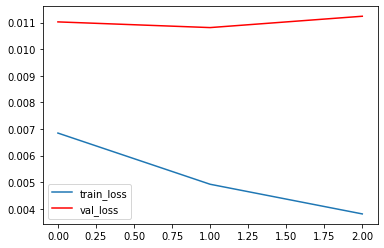

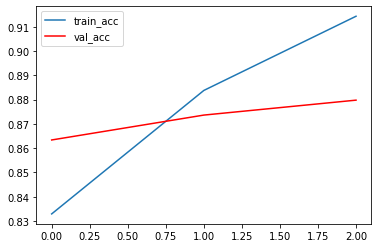

In [15]:
# plot them out
m.plot()

## Prediction

In [16]:
best_model.eval()

total_out = []
for text, mask in tqdm(test_data, total=len(test_data)):
    text = text.to(device)
    mask = mask.to(device)

    output = best_model(text, mask)
    pred = output.logits
    pred = torch.argmax(pred, dim=1)
    total_out.append(pred)

total_out = torch.cat(total_out).cpu().numpy().tolist()

with open('pred.csv', 'w') as f:
    f.write('index,sentiment_label\n')
    for i, pred in enumerate(total_out):
        f.write('{},{}\n'.format(i, pred))

100%|██████████| 92/92 [00:11<00:00,  7.96it/s]
